# Lab1:
$$\Huge \text{Introduction to Jupyter }$$

## Introduction :
    In this Lab  you'll manipulate basic python instructions on Jupyter Notebook. 
    
    Objective :
        - Create Markdown
        - Type Math Formula
        - Graph functions 
        - process basic dataset

In [ ]:
!pwd

In [ ]:
print("hello ")

In [ ]:
! who

In [ ]:
%%bash
pwd
who
ls linear-regression.png

![](linear-regression.png)

$$ \Huge   \hat y = \beta_0 +\beta_1 x$$

In [1]:
import time
time.sleep(10)

## pandas !
- Pandas is a Python library for data analysis.The basic object in pandas is the DataFrame.Think of the DataFrame as a table,a collection of named columns.

In [2]:
import pandas as pd
import numpy as np

$$\Huge y= \frac{1}{1+e^{-x}}$$

In [3]:
import matplotlib.pyplot as plt
#sigmoid = lambda x: 1 / (1 + np.exp(-x))
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
# Finally, call polt()

plt.plot(x,sig)
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
x =pd.DataFrame({'A': np.random.normal(0, 1, 100),'B':np.random.normal(1, 1, 100),'C':np.random.normal(0, 2, 100)})
x.head()

,A,B,C
0,0.892263,0.323149,2.370455
1,-0.879502,-0.139214,0.873053
2,1.302821,-0.356180,-1.084711
3,-0.690845,1.333073,-1.128692
4,-0.726532,2.428123,0.709556


In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

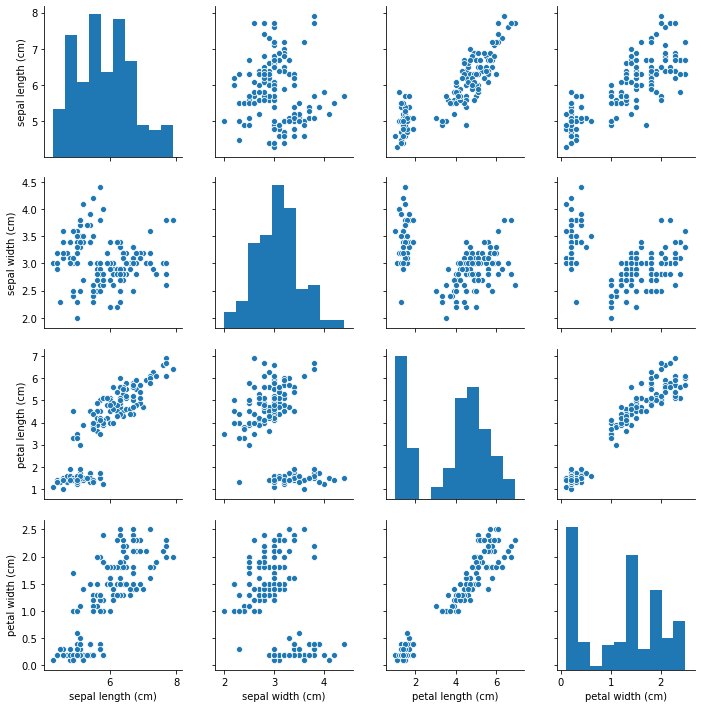

In [10]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df)

$$ \huge \text{ Creation and processing of a Dataset}$$

In [11]:
%%bash
cat > donuts.csv << 'CSV_END'
CA, Rasberry, 6
WA, Glazed, 6
WA, Chocolate, 1
OR, Chocolate, 1
OR, Rasberry, 1
CA, Apple, 12
WA, Chocolate, 6
OR, Apple, 12
OR, Glazed, 6
CSV_END


In [12]:
!ls -l donut*

-rw-r--r--  1 samirAMRI  staff  139 Dec 11 21:27 donuts.csv


In [13]:
!pwd

/Users/medamin/Projets/DataScience/AWS_sageMaker/Lab_1


## Reading CSV

In [14]:
%matplotlib inline
import pandas as pd

In [15]:
df=pd.read_csv("donuts.csv", names=["State", "Donut", "Quantity"])

In [16]:
df

,State,Donut,Quantity
0,CA,Rasberry,6
1,WA,Glazed,6
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Rasberry,1
5,CA,Apple,12
6,WA,Chocolate,6
7,OR,Apple,12
8,OR,Glazed,6


### Inspect Data

In [17]:
df.head()

,State,Donut,Quantity
0,CA,Rasberry,6
1,WA,Glazed,6
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Rasberry,1


### Slecting single Column

In [18]:
df.Quantity

0     6
1     6
2     1
3     1
4     1
5    12
6     6
7    12
8     6
Name: Quantity, dtype: int64

### Plotting Single Columns

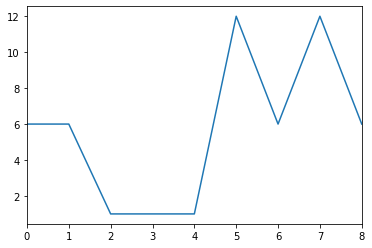

In [19]:
df.Quantity.plot()

### Selecting Columns
- slice by Row

In [20]:
df[df.Quantity==1]

,State,Donut,Quantity
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Rasberry,1


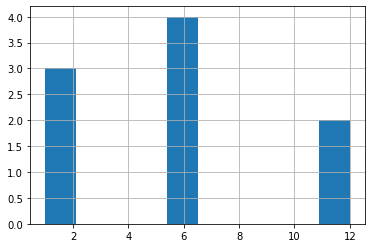

In [21]:
df.Quantity.hist()

### Slecting Columns
- slice by Columns

In [22]:
df[["State", "Quantity"]]

,State,Quantity
0,CA,6
1,WA,6
2,WA,1
3,OR,1
4,OR,1
5,CA,12
6,WA,6
7,OR,12
8,OR,6


### CrossTab

In [23]:
pd.crosstab(df.State, df.Quantity)

Quantity,1,6,12
State,,,
CA,0,1,1
OR,2,1,1
WA,1,2,0


In [24]:
pd.crosstab(df.State, df.Donut)

Donut,Apple,Chocolate,Glazed,Rasberry
State,,,,
CA,1,0,0,1
OR,1,1,1,1
WA,0,2,1,0


In [25]:
pd.crosstab(df.State, df.Donut, df.Quantity , aggfunc=sum, margins=True)

Donut,Apple,Chocolate,Glazed,Rasberry,All
State,,,,,
CA,12.0,NaN,NaN,6.0,18
OR,12.0,1.0,6.0,1.0,20
WA,NaN,7.0,6.0,NaN,13
All,24.0,8.0,12.0,7.0,51
